Imports


In [2]:
from sklearn.datasets import make_circles
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

# Part 1

## Getting the data

In [12]:
x,y = make_circles(n_samples=500, shuffle=True, noise=0.09, random_state=5, factor=0.5)
frac0 = len(np.where(y == 0)[0]) / float(len(y)) * 100
frac1 = len(np.where(y == 1)[0]) / float(len(y)) * 100


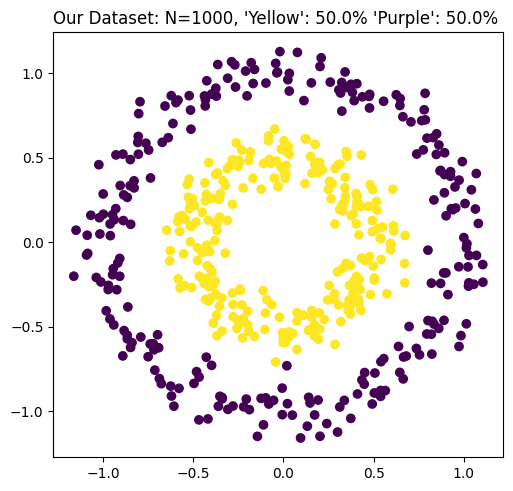

In [13]:
plt.figure(figsize=(5, 5))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(111)
plt.title("Our Dataset: N={0}, 'Yellow': {1}% 'Purple': {2}% ".format(1000,frac0, frac1), fontsize="large")

plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)

plt.show()

## **Section 1:** Neural network with **no activation function**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)
print("number of training examples: ", y_train.shape[0])
print("number of testing examples: ", y_test.shape[0])

number of training examples:  450
number of testing examples:  50


In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation=None), 
                                    tf.keras.layers.Dense(1, activation=None)])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 3s 7ms/step - loss: 1.0066 - accuracy: 0.4467
Epoch 2/100
57/57 [==============================] - 0s 7ms/step - loss: 0.7014 - accuracy: 0.5111
Epoch 3/100
57/57 [==============================] - 0s 8ms/step - loss: 0.7016 - accuracy: 0.4600
Epoch 4/100
57/57 [==============================] - 0s 9ms/step - loss: 0.7066 - accuracy: 0.4311
Epoch 5/100
57/57 [==============================] - 1s 10ms/step - loss: 0.7044 - accuracy: 0.4622
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.7001 - accuracy: 0.4756
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 0.7017 - accuracy: 0.4644
Epoch 8/100
57/57 [==============================] - 0s 6ms/step - loss: 0.6984 - accuracy: 0.4933
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.5156
Epoch 10/100
57/57 [==============================] - 0s 5ms/step - loss: 0.7017 - accuracy: 0.4667
Epoch 11

In [16]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 13ms/step - loss: 0.6943 - accuracy: 0.5400


[0.6942875385284424, 0.5400000214576721]

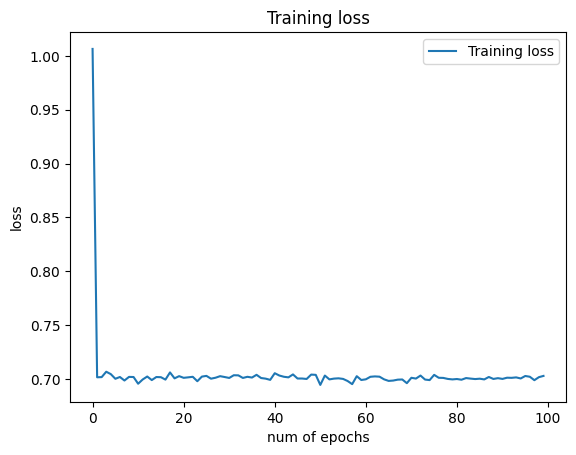

In [17]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

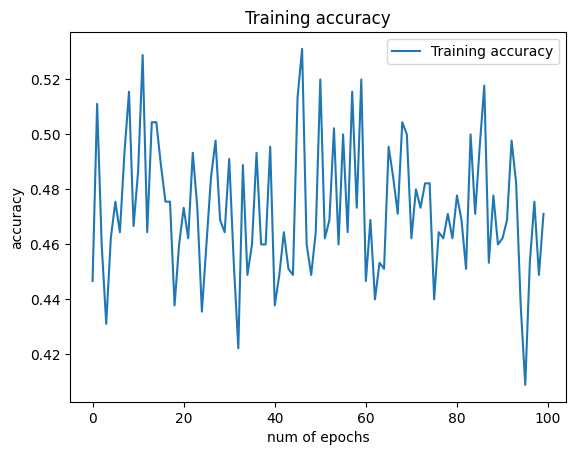

In [18]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Conclusions**

As can be seen, the accuracy of the model is approximately 54%, which is very low, and as seen in the accuracy graph, training the model does not lead to any improvement in accuracy. Additionally, the loss has stopped at a constant value and is not decreasing.

The reason for these issues is that we have not used an activation function, and it is as if we only have a linear function, so our deep network cannot have any effect.

## **Section 2:** Neural network with linear activation function

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='linear'), 
                                    tf.keras.layers.Dense(1, activation='linear')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 3s 6ms/step - loss: 7.0222 - accuracy: 0.4867
Epoch 2/100
57/57 [==============================] - 0s 7ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 3/100
57/57 [==============================] - 0s 7ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 6/100
57/57 [==============================] - 0s 8ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 8/100
57/57 [==============================] - 0s 8ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 9/100
57/57 [==============================] - 1s 10ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 10/100
57/57 [==============================] - 1s 10ms/step - loss: 7.7263 - accuracy: 0.4933
Epoch 1

In [20]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 29ms/step - loss: 6.7097 - accuracy: 0.5600


[6.709664821624756, 0.5600000023841858]

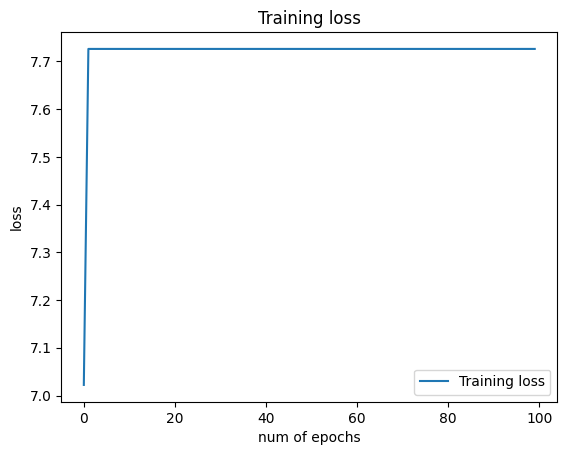

In [21]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

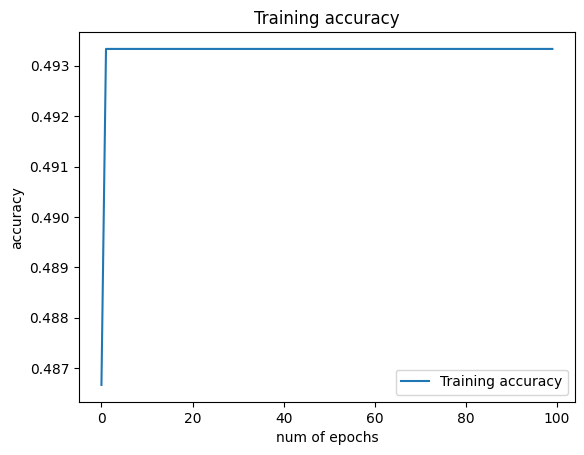

In [22]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Conclusions**

In this case, we also see that our accuracy is approximately 56%, and we do not see any improvement in its trend during training. This is also because we have used a linear activation function, and a linear activation function does not have a good effect on the performance of our neural network because the transformation we have becomes a linear transformation.

## **Section 3:** Using a loss function which is for regression

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 2s 6ms/step - loss: 0.2714 - accuracy: 0.4844
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2692 - accuracy: 0.4800
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2672 - accuracy: 0.4600
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.4378
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.4422
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2626 - accuracy: 0.4467
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.4222
Epoch 8/100
57/57 [==============================] - 0s 7ms/step - loss: 0.2601 - accuracy: 0.4133
Epoch 9/100
57/57 [==============================] - 0s 7ms/step - loss: 0.2589 - accuracy: 0.4044
Epoch 10/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.3689
Epoch 11/

In [25]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 27ms/step - loss: 0.1929 - accuracy: 0.9800


[0.19290977716445923, 0.9800000190734863]

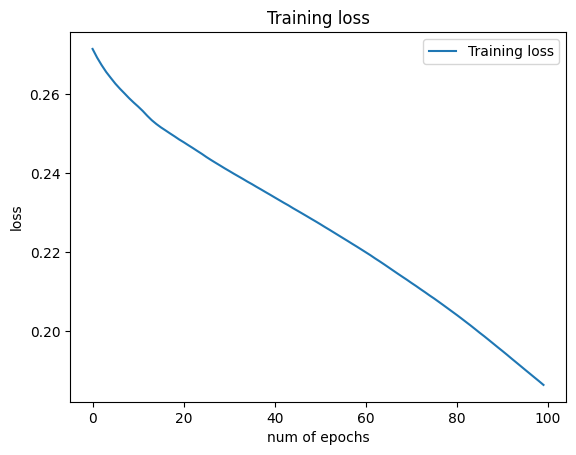

In [24]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

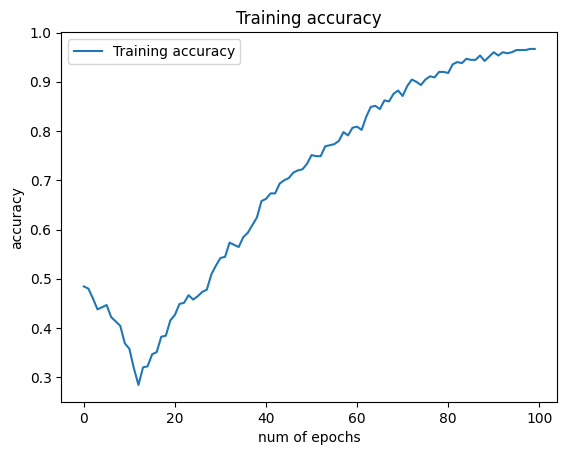

In [26]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Conclusions**

In this case, the loss function of Mean Squared Error has been used, which is specific to regression problems. However, it can be seen that the result is acceptable, and an accuracy of 98% has been achieved. By training the model over epochs, the accuracy of the model has gradually increased, and its loss has also decreased.

## **Section 4:** Neural network with only one layer and small number of neurons

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(4, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
57/57 [==============================] - 2s 6ms/step - loss: 0.2766 - accuracy: 0.4933
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.4756
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.4489
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.4356
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2675 - accuracy: 0.4178
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2660 - accuracy: 0.4333
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.4178
Epoch 8/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.4400
Epoch 9/100
57/57 [==============================] - 0s 7ms/step - loss: 0.2616 - accuracy: 0.4600
Epoch 10/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2604 - accuracy: 0.4556
Epoch 11/

In [28]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 26ms/step - loss: 0.1921 - accuracy: 0.8200


[0.19205749034881592, 0.8199999928474426]

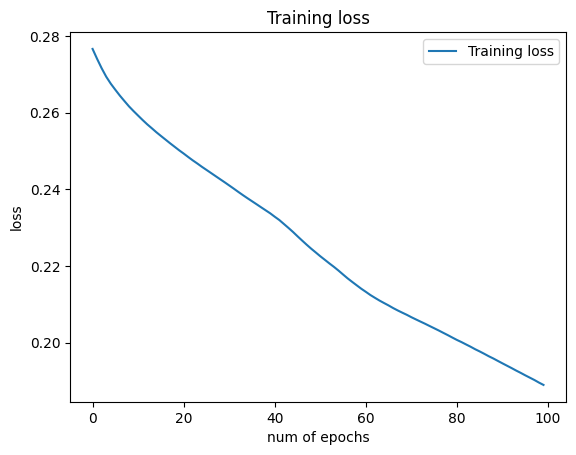

In [29]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

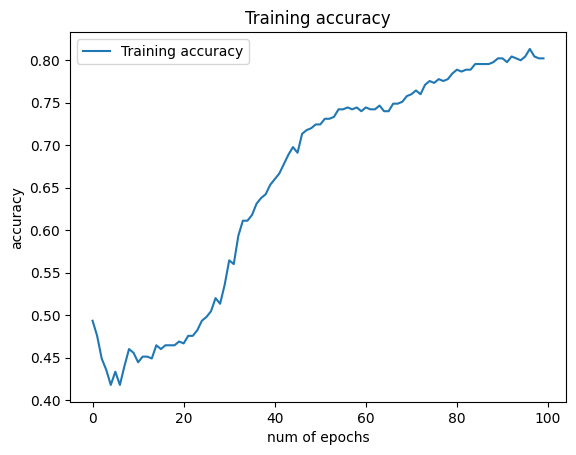

In [30]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Conclusions**

In this case, we see that the model has not been trained well and the final accuracy has reached only 81%. The reason is that only a small number of neurons have been used in a single hidden layer, and as a result, the model has not been able to learn the problem well and perform accurate classification (Underfitting the problem).

## **Section 5:** Adjusting learning rate

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(4, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    callbacks=[
                      tf.keras.callbacks.LearningRateScheduler(
                        lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ])

Epoch 1/100
57/57 [==============================] - 3s 8ms/step - loss: 0.2414 - accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
57/57 [==============================] - 1s 9ms/step - loss: 0.2412 - accuracy: 0.5044 - lr: 0.0011
Epoch 3/100
57/57 [==============================] - 1s 9ms/step - loss: 0.2411 - accuracy: 0.5044 - lr: 0.0012
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.5067 - lr: 0.0013
Epoch 5/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2408 - accuracy: 0.5000 - lr: 0.0014
Epoch 6/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.5022 - lr: 0.0015
Epoch 7/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.5022 - lr: 0.0016
Epoch 8/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2402 - accuracy: 0.5067 - lr: 0.0017
Epoch 9/100
57/57 [==============================] - 0s 6ms/step - loss: 0.2400 - accuracy: 0.5067 - lr:

In [32]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 35ms/step - loss: 0.0254 - accuracy: 0.9600


[0.02542765624821186, 0.9599999785423279]

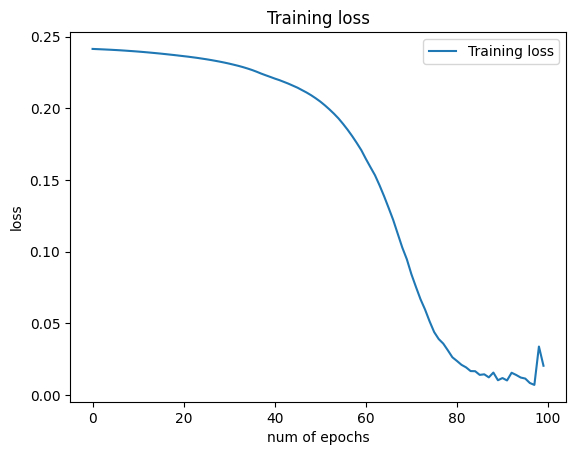

In [33]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

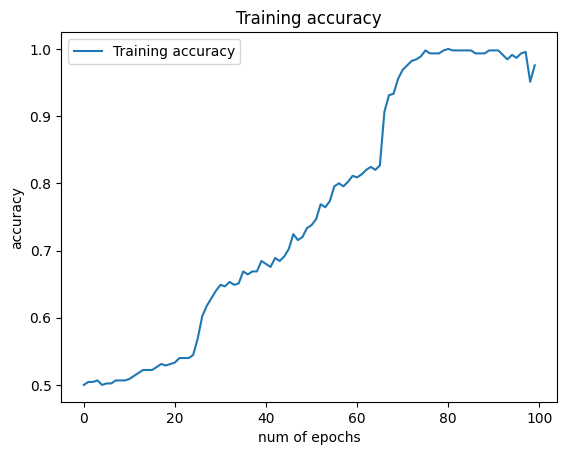

In [34]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

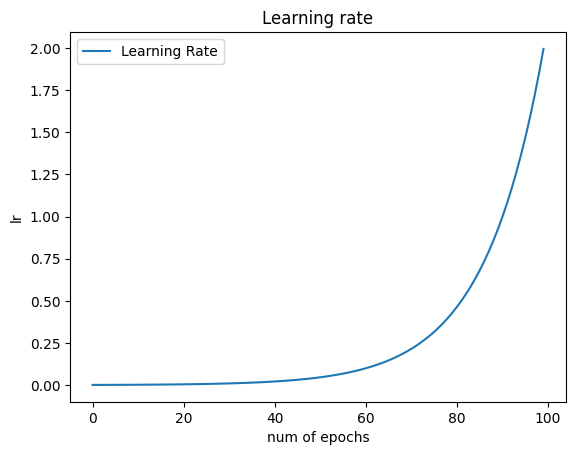

In [35]:
plt.plot(history.epoch, history.history["lr"], label='Learning Rate')
plt.title('Learning rate')
plt.xlabel('num of epochs')
plt.ylabel('lr')
plt.legend()
plt.show()

**Conclusions**

In this case, we increase the learning rate from 0.001 to 2 during 100 epochs. We see that our accuracy increases and the model's loss decreases as we increase the learning rate. However, at some point, both metrics start to deteriorate, so we can't say that a higher learning rate is always better.

To find the best learning rate, we need to pay attention to the training loss chart and identify the point where the slope of the curve is the steepest. We should then set the learning rate to the value at that point. In this case, it appears to be around epoch 70 with a learning rate of 0.2.

## **Section 6:** Best neural network

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=4, epochs=200)

Epoch 1/200
113/113 [==============================] - 4s 6ms/step - loss: 0.6916 - accuracy: 0.4844
Epoch 2/200
113/113 [==============================] - 1s 6ms/step - loss: 0.6732 - accuracy: 0.5111
Epoch 3/200
113/113 [==============================] - 1s 8ms/step - loss: 0.6576 - accuracy: 0.5067
Epoch 4/200
113/113 [==============================] - 1s 6ms/step - loss: 0.6436 - accuracy: 0.5200
Epoch 5/200
113/113 [==============================] - 1s 6ms/step - loss: 0.6293 - accuracy: 0.5556
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 0.6138 - accuracy: 0.5778
Epoch 7/200
113/113 [==============================] - 1s 6ms/step - loss: 0.5952 - accuracy: 0.6644
Epoch 8/200
113/113 [==============================] - 1s 10ms/step - loss: 0.5781 - accuracy: 0.7756
Epoch 9/200
113/113 [==============================] - 1s 8ms/step - loss: 0.5597 - accuracy: 0.8289
Epoch 10/200
113/113 [==============================] - 1s 8ms/step - loss: 0.5390 - accur

In [37]:
print("Evaluation: ")
model.evaluate(x_test, y_test)

Evaluation: 
2/2 [==============================] - 1s 17ms/step - loss: 0.0435 - accuracy: 0.9800


[0.043452054262161255, 0.9800000190734863]

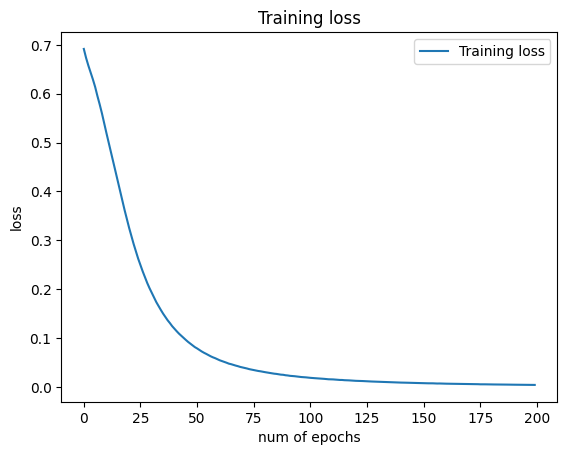

In [38]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

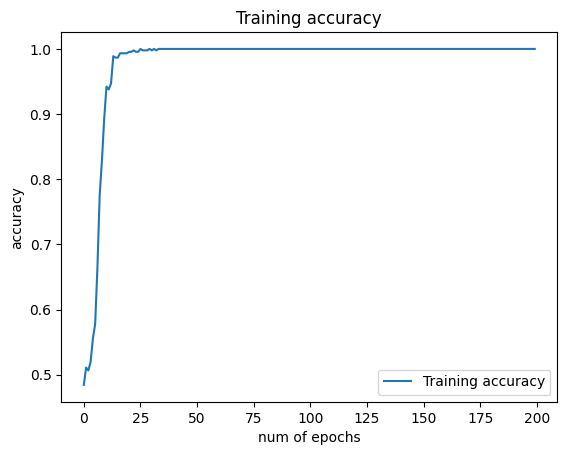

In [39]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Conclusion**

In this part, we have developed the optimal neural network for this problem, achieving an accuracy of 98% and a significantly low loss.

We utilized the powerful Adam optimizer for this task (Combination of RMSProp and Gradient Descent with Momentum). The ReLU activation function was implemented for the hidden layer and the sigmoid activation function for the output layer. We did not increase the number of hidden layers since the problem is relatively simple and increasing the number of layers or neurons could result in overfitting. Overall, the learning performance in this state is considerably better than previous iterations.

# Part 2

Import `fashion mnist` dataset

In [63]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 18s 4us/step


In [42]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

View a photo from our dataset

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

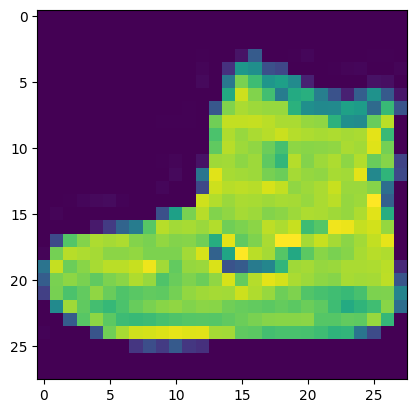

In [43]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

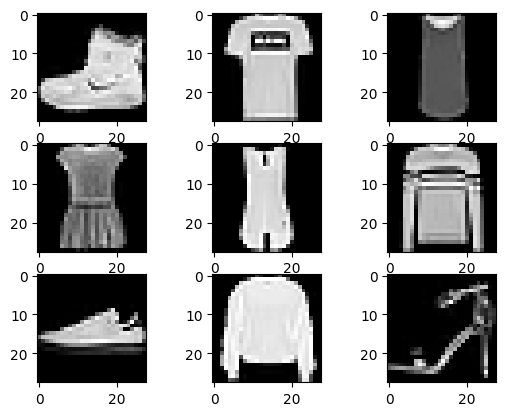

In [46]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow((x_train[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [44]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

## CNN

In this part, we have used 2D Convolution layers and have built a typical CNN model which is often used for Computer Vision

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.10),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)         

This CNN model consists of 2D Convolution layers, followed by MaxPooling layers to reduce the spatial dimensions of the feature maps.       
Dropout layers have also been added to prevent overfitting. The first Conv2D layer has 32 filters and a kernel size of 3 with a ReLU activation function, and takes an input shape of [28, 28, 1].   
 The second Conv2D layer also has 32 filters and a kernel size of 3 with a ReLU activation function. After the second MaxPooling layer, the feature maps are flattened and passed to a Dense layer with 128 units and a ReLU activation function. Finally, there is a Dense layer with 10 units and a softmax activation function, which is used for multiclass classification.    
 This model is a typical architecture used in Computer Vision applications, and has shown good performance on image classification tasks.

In [56]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 74s 73ms/step - loss: 0.5549 - accuracy: 0.7960
Epoch 2/20
938/938 [==============================] - 67s 71ms/step - loss: 0.3697 - accuracy: 0.8659
Epoch 3/20
938/938 [==============================] - 68s 73ms/step - loss: 0.3208 - accuracy: 0.8826
Epoch 4/20
938/938 [==============================] - 72s 76ms/step - loss: 0.2929 - accuracy: 0.8913
Epoch 5/20
938/938 [==============================] - 68s 72ms/step - loss: 0.2719 - accuracy: 0.8986
Epoch 6/20
938/938 [==============================] - 67s 72ms/step - loss: 0.2551 - accuracy: 0.9058
Epoch 7/20
938/938 [==============================] - 68s 72ms/step - loss: 0.2443 - accuracy: 0.9087
Epoch 8/20
938/938 [==============================] - 69s 74ms/step - loss: 0.2304 - accuracy: 0.9137
Epoch 9/20
938/938 [==============================] - 68s 73ms/step - loss: 0.2233 - accuracy: 0.9162
Epoch 10/20
938/938 [==============================] - 68s 72ms/step - loss: 0.212

In [58]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 17ms/step - loss: 0.2608 - accuracy: 0.9133


[0.26076358556747437, 0.9132999777793884]

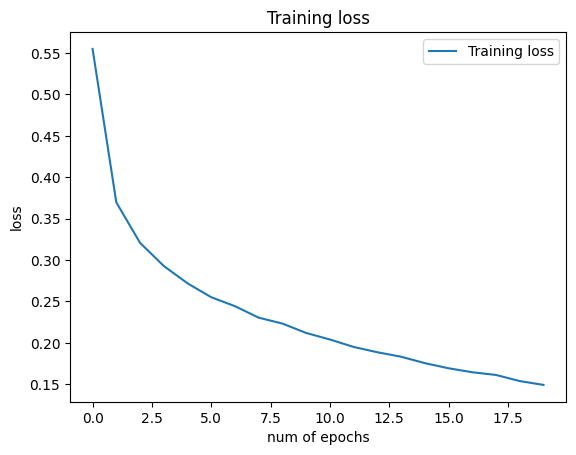

In [59]:
plt.plot(history.epoch, history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

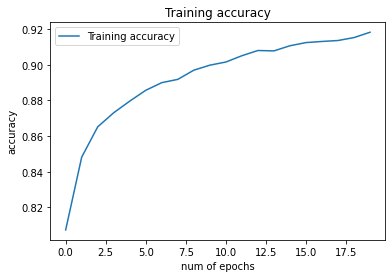

In [172]:
plt.plot(history.epoch, history.history["accuracy"], label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Confusion Matrix

In [60]:
y_pred = model.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [67]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[845,   0,  19,  11,   4,   2, 114,   0,   5,   0],
       [  3, 976,   0,   9,   4,   0,   6,   0,   2,   0],
       [ 16,   0, 891,   5,  41,   1,  44,   0,   2,   0],
       [ 11,   3,  11, 900,  38,   1,  33,   0,   3,   0],
       [  3,   0,  56,  19, 891,   1,  29,   0,   1,   0],
       [  0,   0,   0,   0,   0, 981,   0,  15,   0,   4],
       [ 91,   0,  66,  18,  85,   0, 729,   0,  11,   0],
       [  0,   0,   0,   0,   0,   9,   0, 972,   0,  19],
       [  2,   0,   3,   2,   1,   1,   1,   2, 988,   0],
       [  1,   0,   0,   0,   0,   6,   0,  33,   0, 960]], dtype=int64)

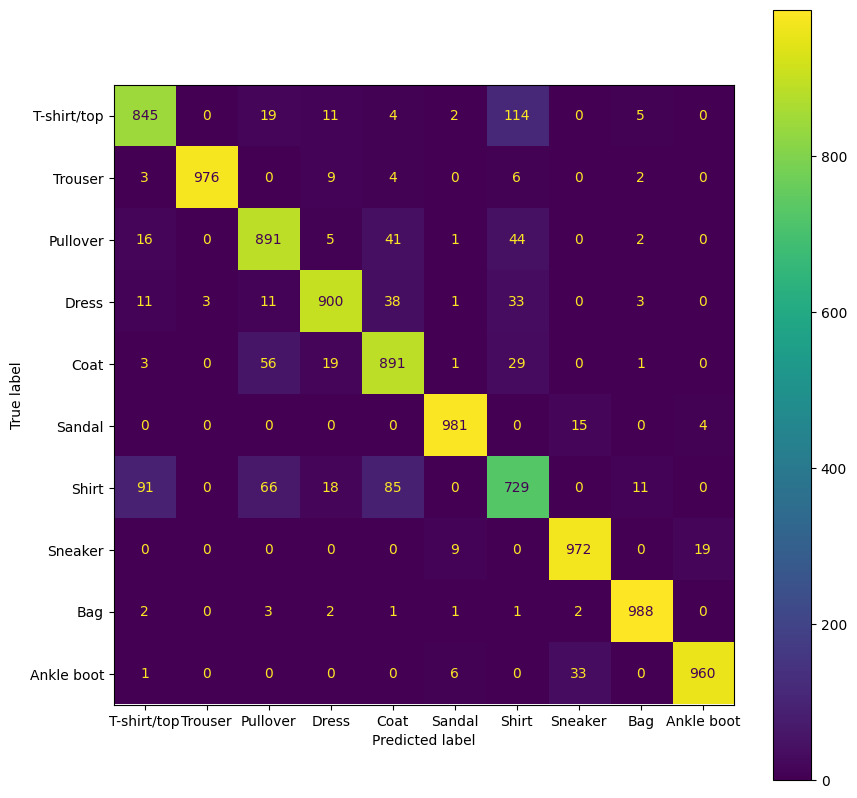

In [66]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

The model has a good overall performance, but it has some difficulty in correctly identifying similar-looking clothing items. This can be seen in the confusion matrix, which shows the number of times each class was predicted, and how many times it was actually correct. Looking at the matrix, we can see that there are some off-diagonal entries, indicating that some clothing items were misclassified. For example, the model has difficulty distinguishing between T-shirt/top and Shirt, as well as between Pullover and Coat. These are similar-looking items, and it's not surprising that the model gets them confused. However, it seems to have better performance with other classes, such as Trouser and Ankle boot, which have high values on the diagonal, indicating that they were correctly classified most of the time.